In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

## 1\. Contexto

A gestão eficaz de crédito é fundamental para o sucesso financeiro de qualquer empresa. Neste relatório, exploraremos os dados fornecidos pela Empresa X para entender os fatores mais relacionados à adimplência e à inadimplência, visando melhorar a gestão de crédito e reduzir a frequência de inadimplência.


## 2\. Exploração de Dados

A compreensão dos fatores que contribuem para a inadimplência é essencial para uma gestão de crédito eficaz. A empresa forneceu os dados em um arqiovo csv, e é nesses dados que vamos trabalhar. Neste relatório, investigaremos a relação entre a coluna "default", que indica se um cliente é adimplente (default = 0) ou inadimplente (default = 1), e variáveis como escolaridade, tipo de cartão e valor das transações na Empresa X. Com isso, será mais fácil tomar decisões a respeito de qual cliente, estatisticamente, poderá ser adimplente ou inadimplente.
Abaixo está uma tabela contendo todos os atributos usados no arquivo.

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


Vamos importar a base de dados.
Os dados faltantes serão identificados como 'na'.

In [2]:
df=pd.read_csv('/kaggle/input/dataset-analise-de-credito/Python_M10_support material (2).csv', na_values = 'na')
df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


## 2.1. Estrutura

Vamos ver quais são os tipos de dados e outras informações sobre cada coluna

In [3]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [4]:
info_1 = df.select_dtypes('object').describe().transpose()
info_1.columns=['Contagem','Número de Valores Únicos', 'Mais Frequênte','Frequência']
info_1

,Contagem,Número de Valores Únicos,Mais Frequênte,Frequência
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Observe que as colunas de escolaridade, estado_civil e salario_anual contém dados faltantes, pois em todas elas o número de elementos é menor que o número total de pessoas (10127). Esses dados serão tratados de forma a ser possível fazer uma análise de dados melhor.

Observe tambem que as colunas de 'limite_credito' e 'valor_transacoes_12m tem uma quantidade de valores únicos muito grande, logo, a melhor forma de análise para essas colunas é por meio de análise de atributos numéricos.

Vamos agora observar dados sobre as colunas preenchidas com números. Eu removi do dataframe abaixo as colunas 'id' e 'default', pois elas não teriam utilidade nesse dataframe.

In [5]:
info_2 = df.select_dtypes('number').describe().transpose()
info_2.columns=['Contagem','Média','Desvio Padrão','Mínimo','25%','50%','75%','Máximo']
info_2.iloc[2:]

,Contagem,Média,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Observe que pelas colunas 'iteracoes_12m' e 'meses_inativo_12m' que há clientes que estão há pelo menos 1 ano inativos. Veja também como o desvio padrão da coluna 'qtd_transacoes_12m' é alto, isso indica que nos dados há muita variação.

Vamos ver a quantidade de linhas e colunas que a base de dados tem.

In [6]:
print(f'A base de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas')

A base de dados tem 10127 linhas e 16 colunas


Vamos ver a quantidade de adimplentes e de inadimplentes da base de dados.

In [7]:
quantidade_adimplentes = df[df['default'] == 0].shape[0]
quantidade_inadimplentes= df[df['default'] == 1].shape[0]

print(f'A quantidade de adimplentes é de: {quantidade_adimplentes} clientes')
print(f'A quantidade de inadimplentes é de: {quantidade_inadimplentes} clientes')

A quantidade de adimplentes é de: 8500 clientes
A quantidade de inadimplentes é de: 1627 clientes


Vamos ver o percentual de adimplência e de inadimplência entre os clientes.

In [8]:
adimplentes,_=df[df['default']==0].shape
inadimplentes,_=df[df['default']==1].shape
total_de_clientes,_= df.shape

print(f'O percentual de adimplentes é de: {round(100*adimplentes/total_de_clientes)} %')
print(f'O percentual de inadimplentes é de: {round(100*inadimplentes/total_de_clientes)} %')

O percentual de adimplentes é de: 84 %
O percentual de inadimplentes é de: 16 %


## **2.3. Dados Faltantes**

Vamos ver quais colunas contém dados faltantes.

In [9]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Os dados faltantes estão nas  colunas: 'escolaridade', 'estado_civil', 'salario_anual'.

Vamos observar a porcentagem de dados faltantes nas colunas com dados faltantes, que são: 'escolaridade', 'estado_civil' e 'salario_anual'.

In [10]:
def estatisticas_dados_faltantes(df: pd.DataFrame)-> None:
    
    estatisticas_dados_faltantes=[]
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ =df[df[col].isna()].shape
            total, _ =df.shape
            dados_faltantes= {col: {'Quantidade': qtd, 'Porcentagem': round(100 * qtd/total,2)}}
            estatisticas_dados_faltantes.append(dados_faltantes)
    for estat in estatisticas_dados_faltantes:
        print(estat)
    

In [11]:
estatisticas_dados_faltantes(df=df)

{'escolaridade': {'Quantidade': 1519, 'Porcentagem': 15.0}}
{'estado_civil': {'Quantidade': 749, 'Porcentagem': 7.4}}
{'salario_anual': {'Quantidade': 1112, 'Porcentagem': 10.98}}


In [12]:
estatisticas_dados_faltantes(df=df[df['default']==0])

{'escolaridade': {'Quantidade': 1263, 'Porcentagem': 14.86}}
{'estado_civil': {'Quantidade': 620, 'Porcentagem': 7.29}}
{'salario_anual': {'Quantidade': 925, 'Porcentagem': 10.88}}


In [13]:
estatisticas_dados_faltantes(df=df[df['default']==1])

{'escolaridade': {'Quantidade': 256, 'Porcentagem': 15.73}}
{'estado_civil': {'Quantidade': 129, 'Porcentagem': 7.93}}
{'salario_anual': {'Quantidade': 187, 'Porcentagem': 11.49}}


A proporção de dados faltantes nas colunas analisadas é praticamente a mesma, tanto no dataframe como um todo, quanto analisando apenas os adimplentes e apenas os inadimplentes.

Vamos analisar uma possível relação entre salário anual e inadimplência.

## 3\. Transformação e Limpeza dos dados

## 3.1. Novo Schema

Vou transformar as colunas: 'valor_transacoes_12m' e 'limite_credito' para formato de número.

In [14]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

Abaixo podemos ver as duas colunas acima mencionadas convertidas para formato de numero.

In [15]:
info_3 =df.select_dtypes('number').describe().transpose()
info_3.columns=['Contagem','Média','Desvio Padrão','Mínimo','25%','50%','75%','Máximo']
info_3.iloc[2:]

,Contagem,Média,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


As colunas: limite_credito e valor_transacoes_12m possuem um desvio padrão alto, logo, há muita variação nos dados.

### **3.2. Remoção de dados faltantes** 


Vou remover de uma vez todos os dados faltantes.

In [16]:
df.dropna(inplace=True)

Vamos conferir se há alguma coluna com algum dado faltante.

In [17]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Vamos ver a proporção de clientes adimplentes depois desse tratamento de dados.

In [18]:
total_atualizado,_ = df.shape
total_adimplentes_atualizado=df[df['default']==0].shape[0]
total_inadimplentes_atualizado=df[df['default']==1].shape[0]

print(f'No dataframe atualizado, dentro de {total_atualizado}, {round(100* total_adimplentes_atualizado/total_atualizado,2)} % de clientes são adimplentes e {round(100* total_inadimplentes_atualizado/total_atualizado,2)} % são inadimplentes.')

No dataframe atualizado, dentro de 7081, 84.28 % de clientes são adimplentes e 15.72 % são inadimplentes.


## 4\. Visualização de dados

Nesta etapa vamos vizualizar os dados, isso é de extrema importância, pois podemos observar relações entre algumas características e a inadimplência, assim, podemos ajudar na decisão de liberar ou não crédito para algum cliente, dentre outras decisões que podem ser tomadas a partir da análise dos dados.

Vamos ver um gráfico mostrando a quantidade de clientes e sua situação de adimplência em relação a faixa salarial.

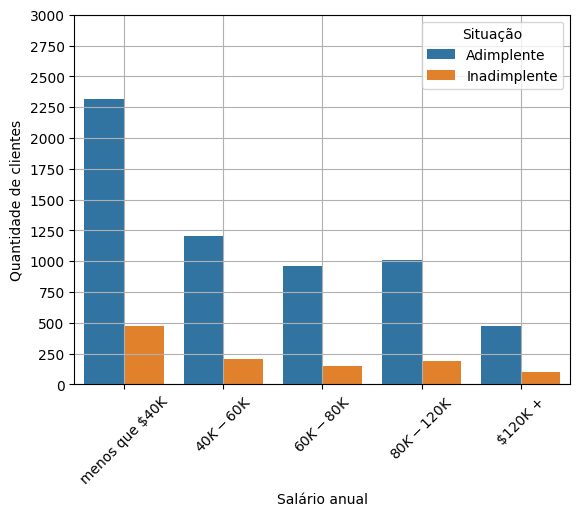

In [19]:
sns.countplot(x='salario_anual',hue='default',data=df,order=['menos que $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'])
plt.xticks(rotation=45)
plt.ylabel('Quantidade de clientes')
plt.xlabel('Salário anual')
plt.yticks(ticks=range(0,3250,250))
legends=('Adimplente','Inadimplente')
plt.legend(legends,title='Situação')
plt.grid(True)

plt.show()

A maioria do inadimplentes ganha menos de 40k por ano, porém, os clientes com salario anual abaixo de 40 são a maioria. 
Abaixo podemos ver a quantidade geral (adimplentes e inadimplentes) de clientes por faixa salarial.

Vamos ver abaixo a quantidade total de clientes por salário anual.

,Salario Anual,Contagem
0,menos que $40K,2792
1,$40K - $60K,1412
2,$80K - $120K,1202
3,$60K - $80K,1103
4,$120K +,572


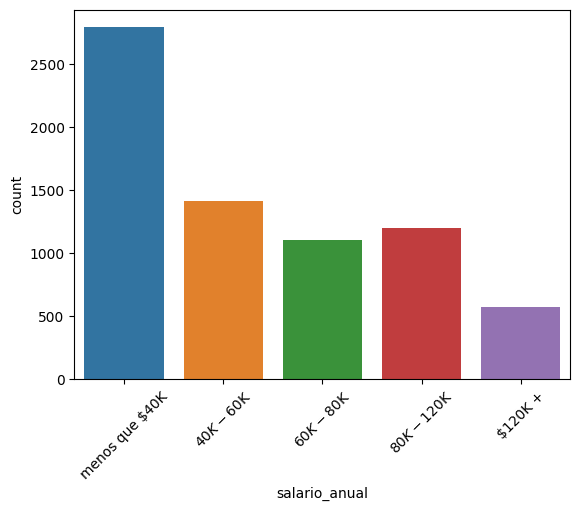

In [20]:
sns.countplot(x='salario_anual',data=df,order=['menos que $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'])
plt.xticks(rotation=45)

faixa_salarial = df['salario_anual'].value_counts().reset_index()
faixa_salarial.columns = ['Salario Anual', 'Contagem']
faixa_salarial


Vamos analisar a quantidade de clientes por tipo de cartao.

In [21]:
qtt=df['tipo_cartao'].value_counts().reset_index()
qtt.columns=['Tipo de cartão', 'Contagem']
qtt

,Tipo de cartão,Contagem
0,blue,6598
1,silver,391
2,gold,81
3,platinum,11


Vamos ver se há relação entre a escolaridade e a situação de default.

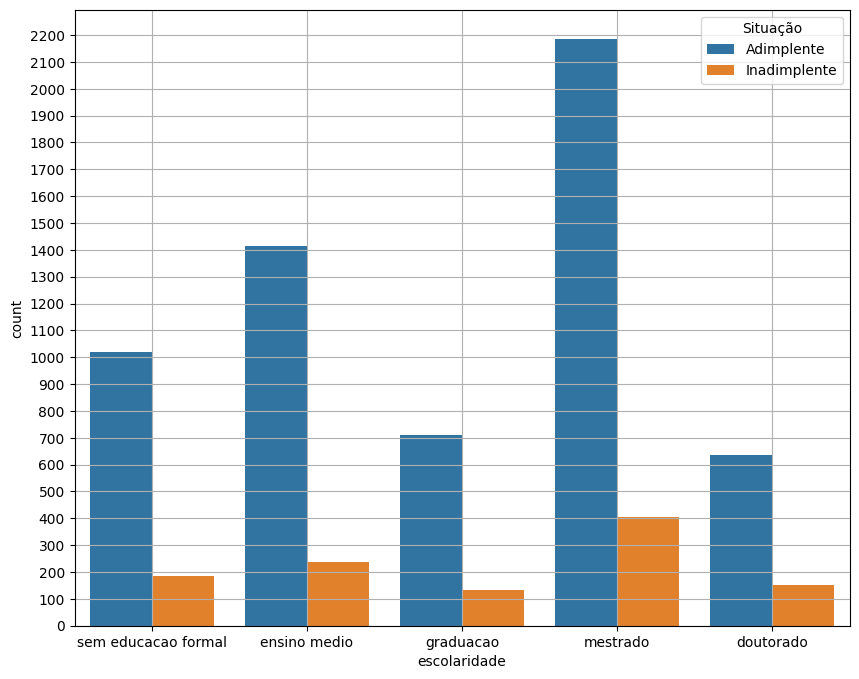

default,0,1
escolaridade,,
doutorado,637,152
ensino medio,1416,237
graduacao,712,132
mestrado,2185,406
sem educacao formal,1018,186


In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='escolaridade',hue='default',data=df,order=['sem educacao formal','ensino medio','graduacao','mestrado','doutorado'])
plt.grid(True)
plt.yticks(range(0,2300,100))
legends=('Adimplente','Inadimplente')
plt.legend(legends, title='Situação')
plt.show()



escolaridade_default= df.groupby(['escolaridade','default']).size().unstack()
nova_ordem = [ 'sem educacao formal','ensino medio', 'graduacao', 'mestrado', 'doutorado']
escolaridade_default.reindex(nova_ordem)
escolaridade_default

In [23]:
escolaridade_adimplente=escolaridade_default[0]
escolaridade_inadimplente=escolaridade_default[1]

total_escolaridade=escolaridade_adimplente+escolaridade_inadimplente



escolaridade_adimplente_resultado= round(100* escolaridade_adimplente/total_escolaridade,2)
escolaridade_adimplente_resultado=pd.DataFrame(escolaridade_adimplente_resultado)
print(f'A porcentagem de adimplentes por escolaridade é: \n {escolaridade_adimplente_resultado} ')

print('________________________________________________________')

escolaridade_inadimplente_resultado= round (100* escolaridade_inadimplente/total_escolaridade,2)
escolaridade_inadimplente_resultado=pd.DataFrame(escolaridade_inadimplente_resultado)
print(f'A porcentagem de inadimplentes por escolaridade é: \n {escolaridade_inadimplente_resultado} ')

A porcentagem de adimplentes por escolaridade é: 
                          0
escolaridade              
doutorado            80.74
ensino medio         85.66
graduacao            84.36
mestrado             84.33
sem educacao formal  84.55 
________________________________________________________
A porcentagem de inadimplentes por escolaridade é: 
                          0
escolaridade              
doutorado            19.26
ensino medio         14.34
graduacao            15.64
mestrado             15.67
sem educacao formal  15.45 


Perceba que não há relação entre essas colunas. Embora a porcentagem de inadimplêntes entre os que tem doutorado é um pouco maior que o restante, essa diferença não é muito relevante.

Vamos ver uma matriz de correlação para ter uma análise completa das correlações dos dados.
A seguinte análise calcula as correlações, ela entrega os resultados em forma de número que vão de -1 até 1.

A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.


 Interprete os valores da seguinte forma:

* 0,9 a 1 (positivo ou negativo): correlação muito forte;
* 0,7 a 09 (positivo ou negativo): correlação forte;
* 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* 0 a 0,3 (positivo ou negativo): não possui correlação.

In [24]:
colunas=df.select_dtypes(include='number')
colunas_2=colunas.iloc[:,1:]
colunas_2.corr()

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
default,1.000000,0.008735,0.011423,0.009249,-0.145713,0.193923,0.152732,-0.015816,-0.160379,-0.357261
idade,0.008735,1.000000,-0.128232,0.791271,-0.022067,-0.023971,0.057870,0.024563,-0.045859,-0.069883
dependentes,0.011423,-0.128232,1.000000,-0.112368,-0.043257,-0.055625,-0.022804,0.081378,0.023234,0.057056
meses_de_relacionamento,0.009249,0.791271,-0.112368,1.000000,-0.016751,-0.011054,0.071305,0.020103,-0.037625,-0.050445
qtd_produtos,-0.145713,-0.022067,-0.043257,-0.016751,1.000000,0.070539,0.005072,-0.074876,-0.348024,-0.246749
iteracoes_12m,0.193923,-0.023971,-0.055625,-0.011054,0.070539,1.000000,0.026269,0.016737,-0.121018,-0.155612
meses_inativo_12m,0.152732,0.057870,-0.022804,0.071305,0.005072,0.026269,1.000000,-0.015728,-0.039977,-0.048169
limite_credito,-0.015816,0.024563,0.081378,0.020103,-0.074876,0.016737,-0.015728,1.000000,0.171592,0.080834
valor_transacoes_12m,-0.160379,-0.045859,0.023234,-0.037625,-0.348024,-0.121018,-0.039977,0.171592,1.000000,0.810074
qtd_transacoes_12m,-0.357261,-0.069883,0.057056,-0.050445,-0.246749,-0.155612,-0.048169,0.080834,0.810074,1.000000


<Axes: >

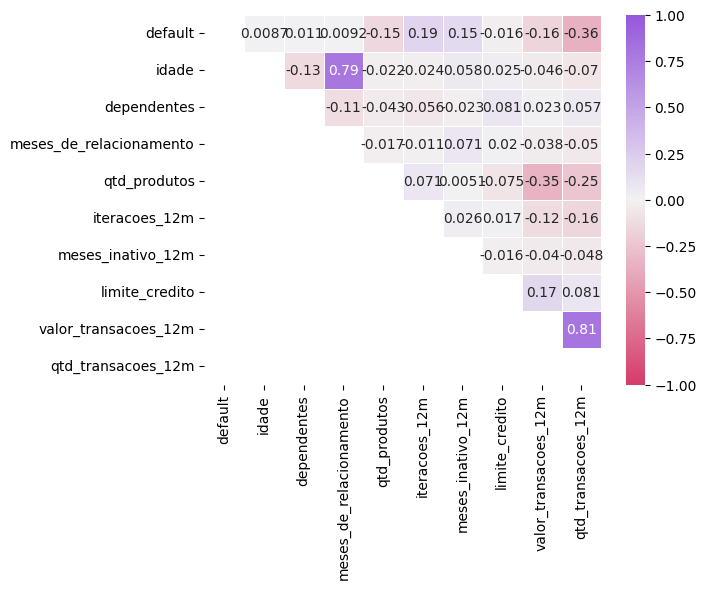

In [25]:
mask = np.tril(colunas_2.corr())
cmap = sns.diverging_palette( 0,1000, as_cmap=True)
sns.heatmap(colunas_2.corr(),annot=True, vmin=-1, vmax=1,cmap=cmap,linewidths=.5,mask=mask)

Observamos que há uma correlação positiva de 0,79 entre idade e meses de relacionamento. Isso é facilmente compreensível: quanto maior a idade do cliente, maior a probabilidade de ele ter um relacionamento mais longo com a empresa.

A quantidade de produtos possui uma correlação negativa de -0,35 com o valor das transações em 12 meses. Esta relação inversa, embora fraca, sugere que os clientes tendem a consumir mais produtos quando esses são mais baratos, resultando em um valor total de transações menor.

Há também uma correlação negativa de -0,36 entre a quantidade de transações em 12 meses e a situação de inadimplência. Embora não seja uma correlação forte, existe uma tendência estatística de que clientes com mais transações em 12 meses tenham uma menor probabilidade de serem inadimplentes.

A quantidade de transações em 12 meses tem uma forte correlação positiva de 0,81 com o valor das transações no mesmo período. No entanto, a correlação negativa de -0,16 entre o valor das transações em 12 meses e a inadimplência é fraca, indicando que não há uma relação significativa entre essas duas variáveis. Portanto, apesar de clientes com maiores valores de transações em 12 meses tendem a realizar mais transações, isso não implica necessariamente que eles tenham uma tendência forte à adimplência.

Vamos observar se há relação entre a quantidade de iterações e a inadimplência em relação à idade.

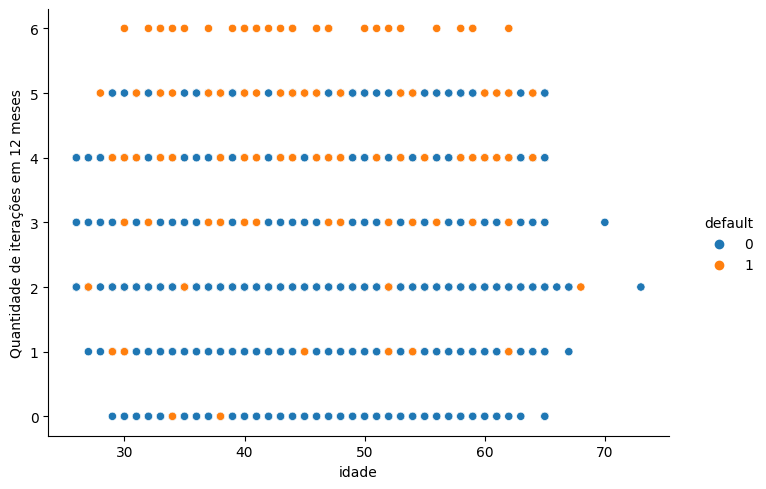

In [26]:
ax = sns.relplot(data=df,x='idade',y='iteracoes_12m',hue='default')
plt.ylabel('Quantidade de iterações em 12 meses')
ax.figure.set_size_inches(8,5)
plt.show()


Observe que quanto maior a idade, há mais inadimplentes.
Observe também que, no gráfico acima, todos os clientes com 6 iterações são inadimplentes.

Vamos observar se há relação entre o valor das transações e a inadimplência em relação à idade.

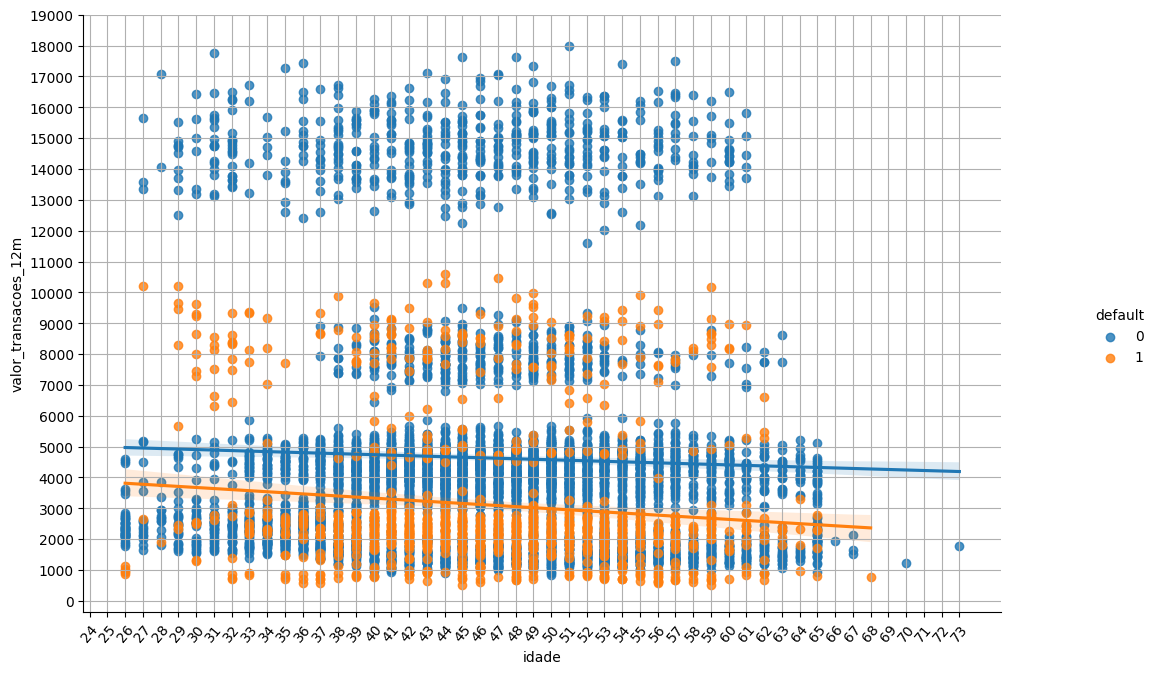

In [27]:
ax = sns.lmplot(data=df,x='idade',y='valor_transacoes_12m', hue='default')
ax.figure.set_size_inches(13,7)
plt.xticks(rotation=50)
plt.xticks(range(24,74,1))
plt.yticks(range(0,20000,1000))
plt.grid(True)


* Observe que nas transações acima de 11000 não há inadimplência.
* Na faixa de valor de transações entre 6000 e 11000, nas idades entre 27 e 35 anos, só há inadimplência.
* Observe, através da linhas, que a maior parte do inadimplêntes está com o valor de transações total abaixo de 4000, e em praticamente todas as faixas de idade.
* Grande parte dos inadimplêntes tem uma soma de transações abaixo de 5000, em todas as faixas de idade.

Vamos observar alguns dados sobre as transações abaixo de 5000 e acima de 11000.

In [28]:
#transações abaixo de 5000.
valores_transacoes_abaixo_5mil = df[df['valor_transacoes_12m'] <= 5000]['valor_transacoes_12m']
descricao_valores_1 = valores_transacoes_abaixo_5mil.describe()
descricao_valores_1 = descricao_valores_1.to_frame().transpose()
descricao_valores_1.columns = ['Número de Transações', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
total_valores_transacoes_abaixo_5mil = valores_transacoes_abaixo_5mil.sum()
descricao_valores_1['Total'] = total_valores_transacoes_abaixo_5mil


#transações acima de 11000.
valores_transacoes_acima_11mil = df[df['valor_transacoes_12m'] >= 11000]['valor_transacoes_12m']
descricao_valores_2 = valores_transacoes_acima_11mil.describe()
descricao_valores_2 = descricao_valores_2.to_frame().transpose()
descricao_valores_2.columns = ['Número de Transações', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
total_valores_transacoes_acima_11mil = valores_transacoes_acima_11mil.sum()
descricao_valores_2['Total'] = total_valores_transacoes_acima_11mil



descricao_valores_1=descricao_valores_1.rename({'valor_transacoes_12m': 'Transações abaixo de 5000'},axis='index')
descricao_valores_2=descricao_valores_2.rename({'valor_transacoes_12m': 'Transações acima de 11000'},axis='index')

descricao_valores=pd.concat([descricao_valores_1,descricao_valores_2])
descricao_valores.round(2)

,Número de Transações,Média,Desvio Padrão,Mínimo,25%,50%,75%,Máximo,Total
Transações abaixo de 5000,5759.0,3064.70,1264.69,510.16,1875.46,3115.65,4270.58,4999.39,17649622.69
Transações acima de 11000,542.0,14742.32,1063.76,11603.72,13998.24,14716.62,15449.63,17995.49,7990336.68


Observe como o total de transações do grupo abaixo de 5000 realizou um total de tranzações com maior valor.

Vamos agora observar se há relação entre a quantidade e os valores das transações em 12 meses, juntamente com a inadimplência.

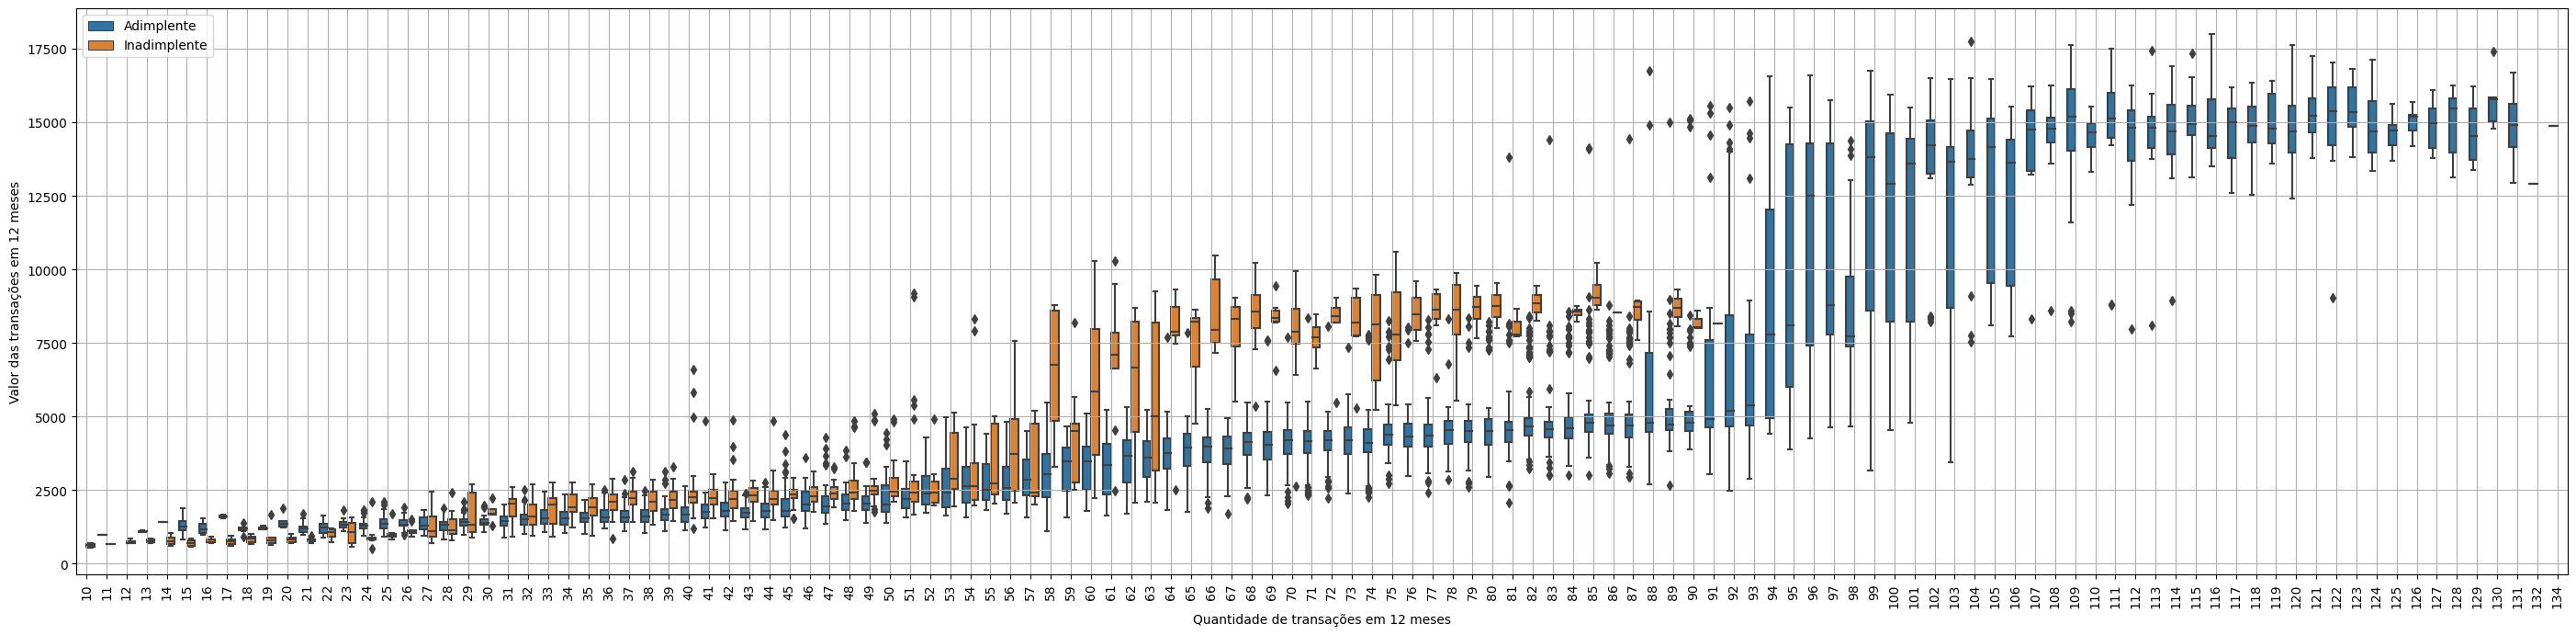

In [29]:
ax = sns.boxplot(data=df,x='qtd_transacoes_12m',y='valor_transacoes_12m',hue='default')
ax.figure.set_size_inches(35,8)
plt.xticks(rotation=90)
plt.xlabel('Quantidade de transações em 12 meses')
plt.ylabel('Valor das transações em 12 meses')
legends=['Adimplente','Inadimplente']
plt.legend(legends)
plt.grid(True)
plt.show()

Observe que com a quantidade de transações entre 29 e 90, praticamente todas as quantidades de transações tem a maioria de inadimplentes, porém, a partir de 90 praticamente só há adimplentes.

# 5\. Conclusão

* A quantidade de inadimplentes é bem parecida em todos os grus de escolaridade.
* A maioria do inadimplentes ganha menos de 40k por ano, porém, os clientes com salario anual abaixo de 40 são a maioria.
* Os clientes que realizam transações acima de 11000 tem tendência à adimplência.
* Os clientes com valor anual de transações (individuais) abaixo de 5000 são a maioria de inadimplentes, porém, o valor total de transações anuais deles é bem maior do que o valor total de transções anuais dos clientes com transações (individuais) acima de 11000. 17649622.69 para o primeiro grupo e 7990336.68 para o segundo grupo.